# Más allá de la regresión lineal simple

En la sesión de hoy seguiremos trabajando con las técnicas de regresión, profundizaremos
en las técnicas de regresión lineal y veremos otras técnicas de regresión no lineal.
Por otra parte revisaremos las métricas más usadas para este problema. Finalmente
trabajaremos en la automatización de los procesos de aprendizaje automático.

1. Uso de la regularización
2. Regresión no lineal: un ejemplo
3. Métricas de regresión
4. Buenas prácticas I: Conjuntos de entrenamiento y test.


## 1. Uso de la regularización

Una forma de encontrar una buena relación entre el sesgo y la varianza es ajustar la complejidad del modelo a través de
**la regularización**. La regularización es un método muy útil para manejar
colinealidad (alta correlación entre características), filtrar el ruido de los datos y
eventualmente evitará el _overfitting_. El concepto detrás de la regularización es introducir
información adicional (sesgo) para penalizar los valores extremas de los parámetros.

Si tenemos que la expresión para una regresión lineal es: $$y = w_0x_0+w_1x_1+...+w_nx_n=\sum^m_{i=0} w_i X_{i}$$

Y la función que queremos minimizar es: $$J(w) = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 $$


### Ridge Regression
La _Ridge Regression_ es un modelo que usa una penalización aplicando la norma L2 donde simplemente agregamos
la suma al cuadrado de los pesos de nuestra función de coste:

$$ J(w)_{Ridge} = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 + \lambda\| w \|_2$$

El uso de esta regresión sería el siguiente:

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)

Al aumentar el valor del hiperparámetro $\lambda$, aumentamos la fuerza de la regularización
y encogemos los pesos de nuestro modelo. Hay que tener en cuenta que no regularizamos
el término del _intercepto_ ($w_0$).

### Lasso Regression (L1)
Un enfoque alternativo que puede conducir a modelos dispersos es la regresión LASSO.
Según sea el valor del término de regularización, ciertos pesos pueden coger el valor cero,
lo que hace que este tipo de regresión LASSO también sea útil como técnica de selección de características
supervisada.

La función a minimizar en este caso es:
$$ J(w)_{Lasso} = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 + \lambda\| w \|_1$$

El uso de esta regresión sería el siguiente:

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

### Elastic Net Regression

Sin embargo, una limitación de LASSO es que selecciona como máximo $n$ variables si $ m > n $.
_Elastic Net_ ofrece un buen compromiso entre la _Ridge_ _regression_  y LASSO, que tiene una
Penalización L1 para generar una selección de características y penalización L2 para superar algunas de las limitaciones de la regresión LASSO, como es el número de variables seleccionadas.

La función a minimizar en este caso es:

$$ J(w)_{Elasticnet} = \sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2 + \lambda_1 \sum^n_{i=1} w^2_j + \lambda_2 \sum^n_{i=1} w_j $$

El uso de esta regresión sería el siguiente:

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)

### Regresión polinómica
La regresión polinomial es un caso especial de regresión lineal en el que se construyen nuevas características en
función del grado del polinomio que se quiera construir.
En las secciones anteriores, hemos asumido una relación lineal entre las variables del modelo y
la variable objetivo. Una forma de no tener en cuenta el supuesto de linealidad es
usar un modelo de regresión polinomial, es decir agregando términos polinomiales.

$$ y = w_0 + w_1x + w_2x^2 + ... + w_dx^d $$

donde $d$ es el grado del polinomio. Aunque podemos usar un polinomio
para modelar una relación no lineal, todavía se considera una
modelo de regresión lineal debido a los coeficientes $w$.




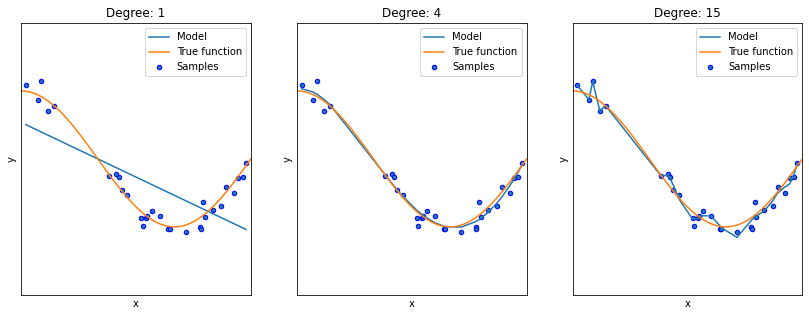

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    
    linear_regression = LinearRegression()
    polynomial_features = PolynomialFeatures(degree=degrees[i])
    polynomial = polynomial_features.fit_transform(X[:, np.newaxis])
    
    linear_regression.fit(polynomial, y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X, linear_regression.predict(polynomial), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")

    plt.title( "Degree: " + str(degrees[i]))
    
plt.show()

## 2. Regresión no lineal: un ejemplo

Cuando queremos resolver un problema usando un modelo más complejo podemos elegir alguno de los siguientes:

- Árboles de regresión
- Bosques de regresión
- SVM para la regresión
- Y todos los modelos que existen...

Realizaremos un ejercicio con los árboles de decisión debido a que son fáciles de entender y que en sesiones futuras
trabajaremos con los análogos de los Bosques de regresión y las SVM para problemas de clasificación.

Los **árboles de decisión (DT)** son un método de aprendizaje supervisado no paramétrico que se utiliza para
clasificación y regresión. El objetivo es crear un modelo que prediga el valor de una variable objetivo mediante
el aprendizaje de reglas de decisión simples inferidas de las características de los datos. Un árbol puede verse como
una aproximación de una función a trozos.

En sci-kit la clase que modela este tipo de árboles se llama `DecisionTreeRegressor` [enlace](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

Veamos un ejemplo sencillo:

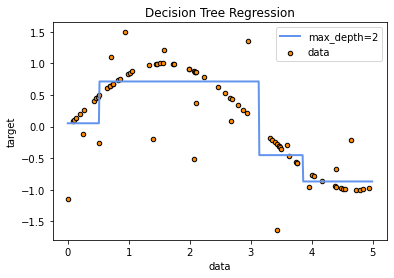

In [26]:
# Importamos las librerias necesarias
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Generamos un conjunto de datos (función seno)
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Entrenamos el modelo

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

# Realizamos una predicción
X_test = np.expand_dims(np.arange(0.0, 5.0, 0.01), 1)
y_1 = regr_1.predict(X_test)

# Mostramos los resultados
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


Vamos a ver la estructura del primer árbol que hemos entrenado para entender mejor el proceso que ha seguido:

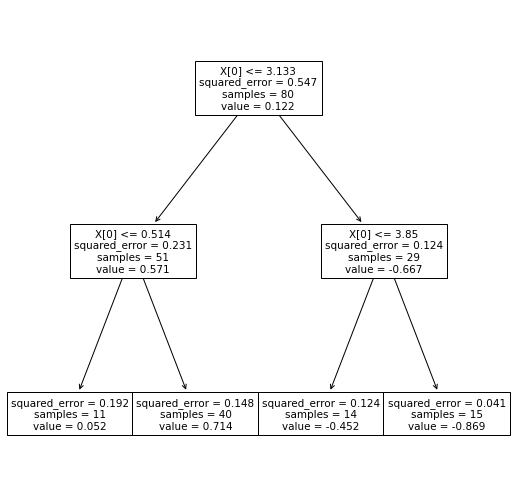

In [21]:
from sklearn import tree
plt.figure(figsize=(9,9))
tree.plot_tree(regr_1);

**Ejercicio**

- Cambia el parámetro _max_depth_ del modelo. Que pasa si es 1? Que pasa si es 5 o mayor?
- Visualiza el árbol resultante. 
- Cuál es la medida de Score de este método (mirar documentación)? Como cambia al permitir árboles más profundos?
- Busca en la documentación de Sci-kit de los Bosques de Regresión ( _RandomForestRegressor_ ) compara el score obtenido cuando incrementamos el número de árboles, manteniendo la misma profundidad.

## 3 Métricas para problemas de regression

Las métricas más comunes en los problemas de regresión son el **error cuadrático** y el **error absoluto**, y sus distintas modificaciones.

### 3.1 Errores cuadráticos

El **error cuadrático (Squared Error)** de un valor predicho con respecto al valor real, se calcula cómo:

$$ SE = \sum_j\left[\hat{y}_j - y_j\right]^2$$


**Error cuadrático medio (Mean Squared Error)** Da una idea del error de nuestras predicciones dando más peso a los errores grandes.

$$ MSE = \frac{1}{m}\sum_j^m \left[\hat{y}_j - y_j\right]^2 $$

**Raiz del error cuadrático medio (Root Mean Square Error)** La raíz cuadrada del MSE produce el error de la raíz cuadrada de la media o la desviación de la raíz cuadrada media (RMSE o RMSD). Tiene las mismas unidades que la cantidad que estima. Para un estimador sin sesgo (bies), el RMSE es la raíz cuadrada de la varianza, es decir la desviación estandar.

$$ RMSE = \sqrt{\frac{1}{m}\sum_j^m \left[\hat{y}_j - y_j\right]^2} $$



A pesar de ser una de las métricas más utilizadas, tiene el inconveniente de ser sensible a los valores extremos (outliers). Cuando este comportamiento pueda suponer un problema, los **errores absolutos** pueden darnos una mejor medida de rendimiento.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set(rc={'figure.figsize':(12, 8)})

In [ ]:
## Escribe una función que devuelva el MSE y el RMSE dados dos arrays de numpy

def MSE(x1, x2):
    """
    Returns the Root Mean Squared Error of the two input vectors
    """
    sq_error = ##
    mean_sq_error = np.##
    return mean_sq_error

def RMSE(x1, x2):
    """
    Returns the Root Mean Squared Error of two vectors. Depends on the MSE function
    """
    mse = MSE(x1, x2)
    root_mse = np.##
    return root_mse

### 3.2 Errores absolutos

El **error absoluto** (Absolute Error) se define cómo:

$$ AE = \sum_j \left|\hat{y}_j - y_j\right| $$

#### Error absoluto medio (Mean Absolute Error)

Es más robusto a los valores extremos y su interpretabilidad es más alta que la del RMSE ya que también está en las unidades de la variable a predecir con la ventaja de que el dato no ha sufrido ninguna transformación.

$$ MAE = \frac{1}{m} \sum_j^m \left|\hat{y}_j - y_j\right| $$

#### Error absoluto medio porcentual (Mean Average Percentage Error)

A pesar de su simpleza, presenta varios inconvenientes a la hora de usarlo de forma práctica. Por ejemplo, **no puede usarse cuando el valor de referencia es 0**. Además, **si se usa para elegir métodos predictivos seleccionará de forma sistemática un metodo que prediga valores bajos.**
[wiki](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)

$$ MAPE = \frac{1}{m} \sum_j^m \left|\frac{\hat{y}_j - y_j}{y_j}\right| $$


### 3.3 Generalización

Las dos **métricas** expuestas anteriormente pueden considerarse como **distancias entre el vector de valores reales y el predicho**. De hecho, el RMSE corresponde a la **distancia euclidiana**, también conocida como norma $l_2$ o $\lVert{v}\rVert_2$.

Por otro lado, el MAE corresponde a la norma $l_1$ o $\lVert{v}\rVert_1$. A esta distancia se la conoce como **distancia de manhattan**, porque sólo se puede viajar de un bloque a otro de la ciudad a traves de calles ortogonales.

De forma general, una norma $l_k$ o $\lVert{v}\rVert_k$ se calcula:

$$\lVert{v}\rVert_k = \left(|v_0|^k + ...+ |v_m|^k \right)^\frac{1}{k}$$

El concepto de distancia será particularmente útil en los problemas de segmentación (aprendizaje no supervisado)


### 3.4 Coeficiente de determinación ($R^2$)

El coeficiente determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo. El valor más alto obtenible será 1, aunque hay casos en los que puede presentar valores negativos. De forma intuitiva, $R^2$ compara el "fit" de nuestro modelo al de una linea recta horizontal. Dada una regresión lineal simple, un $R^2$ negativo sólo es posible cuando la ordenada en el origen o la pendiente están restringidas de forma que el mejor modelo es peor que una linea horizontal.

Si representamos la **varianza de la variable dependiente** por $\sigma^{2}$ y la **varianza residual** por $\sigma _{r}^{2}$, el coeficiente de determinación viene dado por la siguiente ecuación:

$$ R^{2}=1- \frac{\sigma_{r}^{2}}{\sigma ^{2}}$$


Siendo $\hat{y}_i$ el valor predicho de la muestra i y $y_i$ el valor real, el $R^2$ estimado sobre $n_{\text{muestras}}$ se define como:

$$ R^2(y, \hat{y}) = 1 - \frac{\sum_{i=0}^{n_{\text{samples}} - 1} (y_i - \hat{y}_i)^2}{\sum_{i=0}^{n_\text{samples} - 1} (y_i - \bar{y})^2}$$
donde $$ \bar{y} =  \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}} - 1} y_i$$

#### 3.4.1 Consideraciones R²

1. R² no puede determinar si los coeficientes y las predicciones tienen bies: Hay que checkear los residos --> Si observamos patrones en los plots de residuos es indicativo de un mal ajuste a pesar de un R2 elevado

1. Cada vez que añadimos un predictor a un modelo, el R² aumenta aunque sea por suerte, pero nunca decrece. Por consiguiente, un modelo con muchos terminos puede parecer mejor simplemente por el hecho de tener más terminos. Para prevenir este efecto, podemos usar el **adjusted R²**, una versión modificada que se ajusta al número de predictores en el modelo. De ésta forma, el R² solo aumenta si el nuevo término mejora el modelo más que por mera suerte. Siempre es más bajo que el R²

$$\bar{R}^2 = 1 - \frac{N-1}{N-k-1}(1-R^2)$$


n – numero de observaciones

k – numero de parametros


## 4. Buenas prácticas I: Conjuntos de entrenamiento y test.


Para saber cómo funciona el algoritmo necesitaremos dividir nuestro conjunto de datos en diversas partes disjuntas. Típicamente usaremos el bloque más grande de datos(entre el 60% y el 80%) para entrenar nuestro algoritmo de aprendizaje y el resto para poder probar que el algoritmo previamente entrenado funciona bien para nuevos datos, es decir, que tiene la capacidad de **generalizar** lo que ha aprendido.

Este último conjunto se conoce con el nombre de *test*. Para evitar sesgos en los dos conjuntos realizaremos esta división de forma aleatoria. Es importante no utilizar el conjunto de test hasta que no tenemos el
modelo entrenado y ajustado, este conjunto sólo debe servir para evaluar el modelo final.

La librería _scikit-learn_ tiene una función que nos puede ser muy práctica para realizar este trabajo: 


A continuació podeís ver un ejemplo de uso:

```
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)
```